## Analyzing Card Trnsaction for identifying Fraud Transactions

This data is made availble by "Vesta Corporation" for the "IEEE-CIS Fraud Detection" competetion held on Kaggle.<br>
Credit/Debit card transactions are analyzed and flagged as Fraud or Not Fraud, if the transaction is identified as Fraud transaction the card owner is alerted.<br>
In this Analysis we've tried to identify if a transaction is Fraud or Not Fraud.<br>
<br>
A decision tree model, Logistic regression model is used to identify a Fraud transaction.

In [0]:
%pip install mlflow

Python interpreter will be restarted.
Collecting mlflow
 Using cached mlflow-1.16.0-py3-none-any.whl (14.2 MB)
Processing /root/.cache/pip/wheels/e9/f3/dc/eeff77dbc147629fa716741fc216520abbc0e15ce4b876706f/databricks_cli-0.14.3-py3-none-any.whl
Collecting cloudpickle
 Using cached cloudpickle-1.6.0-py3-none-any.whl (23 kB)
Collecting docker>=4.0.0
 Using cached docker-5.0.0-py2.py3-none-any.whl (146 kB)
Processing /root/.cache/pip/wheels/21/4b/32/9be8daf8a4d73da26e4dba66c47c9b4b7d838a6b372981a3ed/gunicorn-20.1.0-py3-none-any.whl
Processing /root/.cache/pip/wheels/9d/de/6d/ca8d461ec29e010b1267d7353d0b058819770f7680bb9360e4/alembic-1.4.1-py2.py3-none-any.whl
Requirement already satisfied: pandas in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.1.3)
Collecting gitpython>=2.1.0
 Using cached GitPython-3.1.14-py3-none-any.whl (159 kB)
Requirement already satisfied: requests>=2.17.3 in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2.24.0)
Collecting protobuf>=3.6.0
 Using cached protobuf-3.15.8-cp38-cp38-manylinux1_x86_64.whl (1.0 MB)
Requirement already satisfied: entrypoints in /databricks/python3/lib/python3.8/site-packages (from mlflow) (0.3)
Collecting querystring-parser
 Using cached querystring_parser-1.2.4-py2.py3-none-any.whl (7.9 kB)
Processing /root/.cache/pip/wheels/12/1a/8d/0c016e06370d07f82def661b6cb7d91d4e6b4ff7f2982e9f2c/prometheus_flask_exporter-0.18.1-py3-none-any.whl
Collecting Flask
 Using cached Flask-1.1.2-py2.py3-none-any.whl (94 kB)
Collecting pyyaml
 Using cached PyYAML-5.4.1-cp38-cp38-manylinux1_x86_64.whl (662 kB)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from mlflow) (1.19.2)
Collecting sqlparse>=0.3.1
 Using cached sqlparse-0.4.1-py3-none-any.whl (42 kB)
Collecting click>=7.0
 Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
Requirement already satisfied: pytz in /databricks/python3/lib/python3.8/site-packages (from mlflow) (2020.5)
Collecting sqlalchemy
 Using cached SQLAlchemy-1.4.11-cp38-cp38-manylinux2014_x86_64.whl (1.5 MB)
Requirement already satisfied: six>=1.10.0 in /usr/local/lib/python3.8/site-packages (from databricks-cli>=0.8.7->mlflow) (1.15.0)
Collecting tabulate>=0.7.7
 Using cached tabulate-0.8.9-py3-none-any.whl (25 kB)
Collecting websocket-client>=0.32.0
 Using cached websocket_client-0.58.0-py2.py3-none-any.whl (61 kB)
Requirement already satisfied: setuptools>=3.0 in /databricks/python3/lib/python3.8/site-packages (from gunicorn; platform_system != "Windows"->mlflow) (50.3.1)
Collecting python-editor>=0.3
 Using cached python_editor-1.0.4-py3-none-any.whl (4.9 kB)
Requirement already satisfied: python-dateutil in /databricks/python3/lib/python3.8/site-packages (from alembic<=1.4.1->mlflow) (2.8.1)
Collecting Mako
 Using cached Mako-1.1.4-py2.py3-none-any.whl (75 kB)
Collecting gitdb<5,>=4.0.1
 Using cached gitdb-4.0.7-py3-none-any.whl (63 kB)
Requirement already satisfied: certifi>=2017.4.17 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2020.12.5)
Requirement already satisfied: chardet<4,>=3.0.2 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (3.0.4)
Requirement already satisfied: idna<3,>=2.5 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (2.10)
Requirement already satisfied: urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1 in /databricks/python3/lib/python3.8/site-packages (from requests>=2.17.3->mlflow) (1.25.11)
Collecting prometheus-client
 Using cached prometheus_client-0.10.1-py2.py3-none-any.whl (55 kB)
Collecting itsdangerous>=0.24
 Using cached itsdangerous-1.1.0-py2.py3-none-any.whl (16 kB)
Collecting Jinja2>=2.10.1
 Using cached Jinja2-2.11.3-py2.py3-none-any.whl (125 kB)
Collecting Werkzeug>=0.15
 Using cached Werkzeug-1.0.1-py2.py3-none-any.whl (298 kB)
Collecting greenlet!=0.4.17; python_version >= "3"
 Using cached greenlet-1.0.0-cp38-cp38-manylinux2010_x86_64.whl (165 kB)
Collecting 

In [0]:
import shutil
import mlflow
import pyspark
from pyspark.sql import SparkSession
import pyspark.sql.types as st
from pyspark.sql.types import StructType,StructField, StringType
from pyspark.sql.functions import isnan, when, count, col, round
from pyspark.ml import Pipeline, Model
from pyspark.ml.feature import StringIndexer, IndexToString, VectorAssembler, OneHotEncoder, OneHotEncoderModel
from distutils.version import LooseVersion

##DATA
Kaggle competetion link: https://www.kaggle.com/c/ieee-fraud-detection/data <br>
Training and Testing datasets are provided by Vesta Corp, the datasets are split into Transaction and Identity datasets.<br>
Training dataset is labelled and Testing dataset is not labelled. For the analysis Training dataset is used to train and test the models in this analysis.<br>
Each of the Training and Testing dataset are split into Identity and Transaction dataset are joined by matching the TransactionID.<br>
Phone verification is required for downloading the data from Kaggle website, for this analysis downloaded datasets are uploaded to googledrive and a link to download those files.<br>

#####<b> TRANSACTION  DATASET FEATURES </b> <br>
TransactionDT -  Timedelta from a given reference datetime (not an actual timestamp) <br>
TransactionAMT -  transaction payment amount in USD <br>
ProductCD  - product code, the product for each transaction  <br>
card1 - card6 payment card information, such as card type, card category, issue bank, country, etc.  <br>
addr - address, dist - distance  <br>
P_ and (R__) email domain - purchaser and recipient email domain  <br>
C1-C14 - counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.  <br>
D1-D15 - timedelta, such as days between previous transaction, etc.  <br>
M1-M9 - match, such as names on card and address, etc.  <br>
Vxxx - Vesta engineered features, including ranking, counting, other entity relations.  <br>

#### Download the Training data

In [0]:
%sh
wget https://www.dropbox.com/s/zmfx8hrt14dlh6y/train_identity.csv?dl=0
wget https://www.dropbox.com/s/0cmnfg35uekw9cz/train_transaction.csv?dl=0
ls -all

--2021-04-26 18:04:31-- https://www.dropbox.com/s/zmfx8hrt14dlh6y/train_identity.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/zmfx8hrt14dlh6y/train_identity.csv [following]
--2021-04-26 18:04:31-- https://www.dropbox.com/s/raw/zmfx8hrt14dlh6y/train_identity.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uce6d7e82aff1517ac51f8c0d05d.dl.dropboxusercontent.com/cd/0/inline/BNXJ7gDf8EKaEr0AHf71SJZIjLpu3G0ytpmD8BWieV5Wiq9F6-yqXKY_aRNOF_Kwal5qITtSlIurmeWB6LaQV3Kp9hVIkk-uLmIXsdTtPJ50eyYyPef-ZO7yfBH0xlXw4zjkh1bzUMclnSAqXR6xGHK2/file# [following]
--2021-04-26 18:04:32-- https://uce6d7e82aff1517ac51f8c0d05d.dl.dropboxusercontent.com/cd/0/inline/BNXJ7gDf8EKaEr0AHf71SJZIjLpu3G0ytpmD8BWieV5Wiq9F6-yqXKY_aRNOF_Kwal5qITtSlIurmeWB6LaQV3Kp9hVIkk-uLmIXsdTtPJ50eyYyPef-ZO7yfBH0xlXw4zjkh1bzUMclnSAqXR6xGHK2/file
Resolving uce6d7e82aff1517ac51f8c0d05d.dl.dropboxusercontent.com (uce6d7e82aff1517ac51f8c0d05d.dl.dropboxusercontent.com)... 162.125.3.15, 2620:100:601b:15::a27d:80f
Connecting to uce6d7e82aff1517ac51f8c0d05d.dl.dropboxusercontent.com (uce6d7e82aff1517ac51f8c0d05d.dl.dropboxusercontent.com)|162.125.3.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26529680 (25M) [text/plain]
Saving to: ‘train_identity.csv?dl=0.1’

 0K .......... .......... .......... .......... .......... 0% 544K 48s
 50K .......... .......... .......... .......... .......... 0% 755K 41s
 100K .......... .......... .......... .......... .......... 0% 861K 37s
 150K .......... .......... .......... .......... .......... 0% 710K 37s
 200K .......... .......... .......... .......... .......... 0% 1.08M 34s
 250K .......... .......... .......... .......... .......... 1% 2.85M 30s
 300K .......... .......... .......... .......... .......... 1% 1.65M 28s
 350K .......... .......... .......... .......... .......... 1% 2.71M 25s
 400K .......... .......... .......... .......... .......... 1% 3.65M 23s
 450K .......... .......... .......... .......... .......... 1% 4.60M 21s
 500K .......... .......... .......... .......... .......... 2% 4.77M 20s
 550K .......... .......... .......... .......... .......... 2% 4.36M 19s
 600K .......... .......... .......... .......... .......... 2% 5.51M 18s
 650K .......... .......... .......... .......... .......... 2% 6.81M 16s
 700K .......... .......... .......... .......... .......... 2% 7.65M 16s
 750K .......... .......... .......... .......... .......... 3% 7.98M 15s
 800K .......... .......... .......... .......... .......... 3% 8.97M 14s
 850K .......... .......... .......... .......... .......... 3% 7.30M 13s
 900K .......... .......... .......... .......... .......... 3% 7.61M 13s
 950K .......... .......... .......... .......... .......... 3% 7.11M 12s
 1000K .......... .......... .......... .......... .......... 4% 8.09M 12s
 1050K .......... .......... .......... .......... .......... 4% 11.1M 11s
 1100K .......... .......... .......... .......... .......... 4% 12.4M 11s
 1150K .......... .......... .......... .......... .......... 4% 10.6M 11s
 1200K .......... .......... .......... .......... .......... 4% 16.4M 10s
 1250K .......... .......... .......... .......... .......... 5% 12.8M 10s
 1300K .......... .......... .......... .......... .......... 5% 13.1M 10s
 1350K .......... .......... .......... .......... .......... 5% 11.1M 9s
 1400K .......... .......... .......... .......... .......... 5% 21.0M 9s
 1450K .......... .......... .......... .......... .......... 5% 16.1M 9s
 1500K .......... .......... .......... .......... .......... 5% 17.0M 8s
 1550K .......... .......... .......... .......... .......... 6% 16.2M 8s
 1600K .......... .......... .......... .......... .......... 6% 18.3M 8s
 1650K .......... .....

#####Rename the downloaded files

In [0]:
%sh
mv train_identity.csv?dl=0 train_identity.csv
mv train_transaction.csv?dl=0 train_transaction.csv
ls -all

total 719184
drwxr-xr-x 1 root root 4096 Apr 26 18:09 .
drwxr-xr-x 1 root root 4096 Apr 26 16:22 ..
-rw-r--r-- 1 root root 0 Apr 26 17:31 Identity.csv
-rw-r--r-- 1 root root 0 Apr 26 17:29 Transaction.csv
drwxr-xr-x 2 root root 4096 Jan 1 1970 conf
drwxr-xr-x 3 root root 4096 Apr 26 16:22 eventlogs
drwxr-xr-x 2 root root 4096 Apr 26 18:00 ganglia
drwxr-xr-x 2 root root 4096 Apr 26 18:00 logs
-rw-r--r-- 1 root root 26529680 Apr 26 17:48 train_identity.csv
-rw-r--r-- 1 root root 26529680 Apr 26 18:04 train_identity.csv?dl=0.1
-rw-r--r-- 1 root root 683351067 Apr 26 18:05 train_transaction.csv

In [0]:
transaction_file_path = 'file:/databricks/driver/train_transaction.csv'   #'dbfs:/FileStore/tables/train_transaction.csv'
identity_file_path = 'file:/databricks/driver/train_identity.csv' #'dbfs:/FileStore/tables/train_identity.csv'

###Load Transaction and Identity data into Spark DataFrames

In [0]:
transaction_df =  spark.read.csv(transaction_file_path, inferSchema=True, header=True, mode= 'DROPMALFORMED')
identity_df = spark.read.csv(identity_file_path, inferSchema= True, header= True, mode= 'DROPMALFORMED')

In [0]:
print (f"Transaction dataset has {transaction_df.count()} rows and {len(transaction_df.columns)} columns")
print (f"Identity dataset has {identity_df.count()} rows and {len(identity_df.columns)} columns")

Transaction dataset has 590540 rows and 394 columns
Identity dataset has 144233 rows and 41 columns

In [0]:
print("Transaction dataset columns:" ,transaction_df.columns)

Transaction dataset columns: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339']

In [0]:
print("Identity dataset columns", identity_df.columns)

Identity dataset columns ['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo']

####Join Trnsaction and Identity data farmes on TransactionID column

In [0]:
merged_df = transaction_df.join(identity_df,  transaction_df["TransactionID"] == identity_df["TransactionID"], how = 'inner').drop(identity_df["TransactionID"])
merged_records_count = merged_df.count()
print(f"No of columns = {len(merged_df.columns)}, No of Records = {merged_df.count()}")

No of columns = 434, No of Records = 144233

#####Merged dataset has 144233 Records, 434 Columns

####Summary table for Merged dataset

In [0]:
display(merged_df.describe())

summary,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,M1,M2,M3,M4,M5,M6,M7,M8,M9,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,V41,V42,V43,V44,V45,V46,V47,V48,V49,V50,V51,V52,V53,V54,V55,V56,V57,V58,V59,V60,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V138,V139,V140,V141,V142,V143,V144,V145,V146,V147,V148,V149,V150,V151,V152,V153,V154,V155,V156,V157,V158,V159,V160,V161,V162,V163,V164,V165,V166,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V217,V218,V219,V220,V221,V222,V223,V224,V225,V226,V227,V228,V229,V230,V231,V232,V233,V234,V235,V236,V237,V238,V239,V240,V241,V242,V243,V244,V245,V246,V247,V248,V249,V250,V251,V252,V253,V254,V255,V256,V257,V258,V259,V260,V261,V262,V263,V264,V265,V266,V267,V268,V269,V270,V271,V272,V273,V274,V275,V276,V277,V278,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
count,144233,144233,144233,144233,144233,144233,143331,144061,144049,143277,144055,83786,83786,0,37593,130842,131083,144233,144233,144233,144233,144233,144233,144233,144233,144233,144233,144233,144233,144233,144233,144015,31116,29059,64768,33075,67373,36140,74926,74926,69232,0,58909,61936,62165,68317,0,0,0,60831,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,69181,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,64745,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,67706,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,68266,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,144169,81637,81637,81637,81637,81637,81643,81643,81643,81637,81637,81637,81637,81643,81643,81643,81637,81637,81637,81637,81637,81637,81643,81643,81637,81637,81637,81643,81643,81643,139631,139631,139819,139819,139819,139631,139631,139819,139819,139631,139631,139631,139631,139819,139631,139631,139631,139819,139819,139631,139631,139819,139819,139631,139631,139631,139631,139819,139819,139631,139819,139819,139631,139819,139819,139631,139631,139631,139631,139631,139631,139819,139819,139819,139631,139631,139631,139631,139631,139631,130269,130269,130269,141106,141106,141106,130269,130269,130269,130269,141106,130269,130269,130269,130269,130269,130269,141106,130269,130269,130269,141106,141106,130269,130269,130269,130269,130269,141106,130269,13

###Aggregations and Visualizations

In [0]:
fraud_counts_df = merged_df.groupBy("isFraud").count()
display(fraud_counts_df[["isFraud", "count"]])

isFraud,count
1,11318
0,132915


####Fraud transaction percentages for diffrennt purchased product categories
######Below stacked barchart indicates the percentage of Fraud transactions for different product categories,
######With every transaction, there is purchased product category is available in the dataset.

In [0]:
product_purchase = merged_df.groupBy("ProductCD").count()
product_purchase_fraud = merged_df.filter(merged_df["isFraud"] == 1).groupBy("ProductCD").count()
product_purchase_fraud = product_purchase_fraud.withColumnRenamed("count", "count_fraud")
product_purchase_fraud = product_purchase_fraud.join(product_purchase, product_purchase_fraud["ProductCD"] == product_purchase["ProductCD"]).drop( product_purchase["ProductCD"])
display(product_purchase_fraud)

count_fraud,ProductCD,count
7640,C,62192
684,S,11585
1423,R,37548
1571,H,32908


####Percentage of Fraud transactions by different  Credit and Debit card issuing companies.
Below chart shows the percentage of fraud transactions for cards issued by different comapanies.
The American Express issued cards have the lowest fraud transaction.
VISA issued cards have the highest percentage of fradu transactions.

In [0]:
transaction_card_type_df = merged_df.groupBy("card4").count()
fraud_transaction_card_type_df = merged_df.filter(merged_df["isFraud"] == 1).groupBy("card4").count()
fraud_transaction_card_type_df = fraud_transaction_card_type_df.withColumnRenamed("count", "count_fraud")
fraud_transaction_card_type_df = fraud_transaction_card_type_df.join(transaction_card_type_df, transaction_card_type_df["card4"] == fraud_transaction_card_type_df["card4"]).drop(transaction_card_type_df["card4"])
display(fraud_transaction_card_type_df)

count_fraud,card4,count
3920,mastercard,44186
239,american express,8298
177,discover,2266
6968,visa,89299


##DATA Cleaning
1) Only columns with atleast 95% NON-NULL values are considered for Analysis. <br>
2) Drop records with missing values (from those with 95% complete data). <br>
3) Create categorical variables from columns with string types\(Using StringIndexer). <br>
4) Drop categorical columns with morethan 32 unique values. <br>

Calculate the percentage of Not Null values in each of the columns of merged data farme <br>
Calculated the proportion of values available for each of the columnd in the entire dataframe ([0 to 1]). <br>
Filtered columns for which 95% data is valid (Not Null) and saved into a new dataframe. <br>
From the new dataframe filter out records with missing details. <br>

In [0]:
not_null_result_df = merged_df.select([count(when(col(c).isNotNull() , c)).alias(c) for c in merged_df.columns])

In [0]:
print(not_null_result_df.columns,  len(not_null_result_df.columns))

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V82', 'V83', 'V84', 'V85', 'V86', 'V87', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V138', 'V139', 'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147', 'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155', 'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163', 'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235', 'V236', 'V237', 'V238', 'V239', 'V240', 'V241', 'V242', 'V243', 'V244', 'V245', 'V246', 'V247', 'V248', 'V249', 'V250', 'V251', 'V252', 'V253', 'V254', 'V255', 'V256', 'V257', 'V258', 'V259', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V270', 'V271', 'V272', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'V322', 'V323', 'V324', 'V325', 'V326', 'V327', 'V328', 'V329', 'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338', 'V339', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06', 'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo'] 434

In [0]:
col_list =  not_null_result_df.columns
val_list =  [val for val in not_null_result_df.collect()[0]]
zip_data = zip(col_list, val_list)
columns = ["Variable","Not_Null_Count"]
non_null_cnt_df = spark.createDataFrame(data= zip_data, schema= columns)
non_null_cnt_df.printSchema()
non_null_cnt_df = non_null_cnt_df.withColumn("Not_Null_Proportion", round(non_null_cnt_df["Not_Null_Count"]/merged_records_count, 2))
display(non_null_cnt_df)

root
-- Variable: string (nullable = true)
-- Not_Null_Count: long (nullable = true)

Variable,Not_Null_Count,Not_Null_Proportion
TransactionID,144233,1.0
isFraud,144233,1.0
TransactionDT,144233,1.0
TransactionAmt,144233,1.0
ProductCD,144233,1.0
card1,144233,1.0
card2,143331,0.99
card3,144061,1.0
card4,144049,1.0
card5,143277,0.99


In [0]:
complete_column_list = [column_row["Variable"] for column_row in  non_null_cnt_df.filter(non_null_cnt_df["Not_Null_Proportion"] ==1).select(["Variable"]).collect()]
print(f"Number of columns with no missing data are :{len(complete_column_list)}")

Number of columns with no missing data are :112

In [0]:
complete_95_column_list = [column_row["Variable"] for column_row in  non_null_cnt_df.filter(non_null_cnt_df["Not_Null_Proportion"] >=0.95).select(["Variable"]).collect()]

In [0]:
complete_at_95_df = merged_df[complete_95_column_list]
complete_at_95_df = complete_at_95_df.dropna()
print (f"Number of complete columns {complete_at_95_df.count()}")

Number of complete columns 133285

###Convert Categorical columns using StringIndexer and OneHotEncoding

Using StringIndexer convert columns with String factors into numercial data columns, there are 13 columns to be coverted.

In [0]:
complete_at_95_df = spark.read.csv(path = "dbfs:/mnt/complete_at_95_df.csv", inferSchema= True, header= True,mode= 'DROPMALFORMED')

In [0]:
## Code to create indexer columns
string_columns = [coltype[0] for coltype  in complete_at_95_df.dtypes if coltype[1] == 'string']
string_index_columns = [x+ "_index" for x in string_columns]
print(f"Cagegorical columns {string_columns}")

stages = []
for i in range(len(string_columns)):
  string_col = string_columns[i]
  indexer_col = string_index_columns[i]
  str_indexer = StringIndexer(inputCol= string_col, outputCol= indexer_col) 
  one_hot_encoder = OneHotEncoder(inputCol = str_indexer.getOutputCol(),  outputCol= str_indexer.getInputCol() + "classVec")
  stages.extend([str_indexer, one_hot_encoder])
one_hot_encoding = Pipeline(stages= stages)
complete_at_95_encoded_df = one_hot_encoding.fit(complete_at_95_df).transform(complete_at_95_df)    

Cagegorical columns ['ProductCD', 'card4', 'card6', 'id_12', 'id_15', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType']

In [0]:
complete_at_95_original_df = complete_at_95_encoded_df
display(complete_at_95_encoded_df.head(25))

TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V220,V221,V222,V227,V234,V238,V239,V245,V250,V251,V255,V256,V259,V270,V271,V272,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_12,id_15,id_17,id_19,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,ProductCD_index,ProductCDclassVec,card4_index,card4classVec,card6_index,card6classVec,id_12_index,id_12classVec,id_15_index,id_15classVec,id_28_index,id_28classVec,id_29_index,id_29classVec,id_31_index,id_31classVec,id_35_index,id_35classVec,id_36_index,id_36classVec,id_37_index,id_37classVec,id_38_index,id_38classVec,DeviceType_index,DeviceTypeclassVec
2987240,1,90193,37.098,C,13413,103.0,185.0,visa,137.0,credit,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,169947.0,3.0,0.0,100.0,NotFound,Found,225.0,266.0,325.0,Found,Found,chrome 54.0 for android,F,F,T,T,mobile,0.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 3, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 2, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",64.0,"Map(vectorType -> sparse, length -> 129, indices -> List(64), values -> List(1.0))",1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",0.0,"Map(vectorType -> sparse, length -> 1, indices -> List(0), values -> List(1.0))",1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())",1.0,"Map(vectorType -> sparse, length -> 1, indices -> List(), values -> List())"
2987265,0,90581,50.0,H,17400,174.0,150.0,visa,226.0,debit,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0

In [0]:
##complete_at_95_encoded_df = complete_at_95_encoded_df_
###complete_at_95_df.write.option("header", "true").csv("dbfs:/mnt/complete_at_95_df.csv")

In [0]:
## From the dataframe drop the columns for which indexer columns were generated
## get a list of columns for which colnames starts with 'V', these columns are geneated by Vesta
##complete_at_95_df = complete_at_95_df.drop(*string_columns)
#complete_at_95_df = spark.read.csv(path = "dbfs:/mnt/complete_at_95_df.csv", inferSchema= True, header= True,mode= 'DROPMALFORMED')

##MODEL BUILDING AND EVALUATION
##### M1 - DECISION TREE (With Fewre Predictors)
##### M2- DECISION TREE 
##### M2- LOGISTIC REGRESSION
##### M3- GRADIENT BOOSTED TREE

In [0]:
from pyspark.ml.feature import VectorAssembler,RFormula
from pyspark.ml.classification import DecisionTreeClassifier, LogisticRegression, RandomForestClassifier, GBTClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder 

#####SPLIT DATA INTO TRAINING AND VALIDATION SETS

In [0]:
#sub_complete_at_95_df = complete_at_95_df[sub_columns]
train_data, test_data  = complete_at_95_encoded_df.randomSplit([0.7, 0.3], 11)
print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 93304
Number of testing records : 39981

<b>
The MIN BIN  size for DECISION TREES nodes is 32, The DECISION TREE would throw an error if the MIN BIN size is less than the MAX NUMBER of Categories for a Feature.
To avoid the Max Bin error for DECISION TREE we've to set the MAX BIN to be miniimum as many as max number of categories for a feature <br>
<i> "IllegalArgumentException: requirement failed: DecisionTree requires maxBins (= 32) to be at least as large as the number of values in each categorical feature, but categorical feature 338 has 130 values. Consider removing this and other categorical features with a large number of values, or add more training examples. <i> <br>
<b>
Below code finds the Max number of categoreis in each of the category features.

#####CREATE FEATURE COLUMNS LIST

In [0]:
## Take backup of the current dataframe, Create a list of columns to exclude from analysis (Original columns of onehot encoded columns)
column_list_at_95 = complete_at_95_encoded_df.columns
columns_to_exclude = []
columns_to_exclude.extend(string_columns)
columns_to_exclude.extend(string_index_columns)
columns_to_include = [col_name for col_name in complete_at_95_encoded_df.columns if col_name not in columns_to_exclude]
print (columns_to_include)

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_17', 'id_19', 'id_20', 'ProductCDclassVec', 'card4classVec', 'card6classVec', 'id_12classVec', 'id_15classVec', 'id_28classVec', 'id_29classVec', 'id_31classVec', 'id_35classVec', 'id_36classVec', 'id_37classVec', 'id_38classVec', 'DeviceTypeclassVec']

In [0]:
complete_at_95_encoded_df.count()

Out[156]: 133285

In [0]:
#index_col_list = [x for x in column_list_at_95 if x.endswith("index")]
categorical_features = string_columns
categorical_count ={}
for colname in categorical_features:
  distinct_count = complete_at_95_df.select(colname).distinct().count()
  categorical_count[colname] = distinct_count
    
categorical_col_cat_count = [col_name for col_name in categorical_count.items() if col_name[1] >= 32 ]
print(f"Categorical Features with high categories {categorical_col_cat_count}")

Categorical Features with high categories [('id_31', 130)]

In [0]:
#feature_columns = [x for x in column_list_at_95 if not x.startswith("V")]
feature_columns = [x for x in columns_to_include]
feature_columns.remove("isFraud")
feature_columns.remove("TransactionID")
###feature_columns = [col_name for col_name in  feature_columns if not col_name in categorical_col_to_exclude]
print(feature_columns)

['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V279', 'V280', 'V281', 'V282', 'V283', 'V284', 'V285', 'V286', 'V287', 'V288', 'V289', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V300', 'V301', 'V302', 'V303', 'V304', 'V305', 'V306', 'V307', 'V308', 'V309', 'V310', 'V311', 'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320', 'V321', 'id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_17', 'id_19', 'id_20', 'ProductCDclassVec', 'card4classVec', 'card6classVec', 'id_12classVec', 'id_15classVec', 'id_28classVec', 'id_29classVec', 'id_31classVec', 'id_35classVec', 'id_36classVec', 'id_37classVec', 'id_38classVec', 'DeviceTypeclassVec']

In [0]:
len(feature_columns)

Out[131]: 194

#####CREATE FORMULA, PIPELINE, PARAMGRIC OBJECTS

In [0]:
# RFormula transformation
formula = "{} ~ {}".format("isFraud", " + ".join(feature_columns))
rformula = RFormula(formula = formula)
print("Formula : {}".format(rformula))
pipeline_1 = Pipeline(stages=[]) 
basePipeline =[rformula]

Formula : RFormula(isFraud ~ TransactionDT + TransactionAmt + card1 + card2 + card3 + card5 + C1 + C2 + C3 + C4 + C5 + C6 + C7 + C8 + C9 + C10 + C11 + C12 + C13 + C14 + D1 + V95 + V96 + V97 + V98 + V99 + V100 + V101 + V102 + V103 + V104 + V105 + V106 + V107 + V108 + V109 + V110 + V111 + V112 + V113 + V114 + V115 + V116 + V117 + V118 + V119 + V120 + V121 + V122 + V123 + V124 + V125 + V126 + V127 + V128 + V129 + V130 + V131 + V132 + V133 + V134 + V135 + V136 + V137 + V167 + V168 + V169 + V170 + V171 + V172 + V173 + V174 + V175 + V176 + V177 + V178 + V179 + V180 + V181 + V182 + V183 + V184 + V185 + V186 + V187 + V188 + V189 + V190 + V191 + V192 + V193 + V194 + V195 + V196 + V197 + V198 + V199 + V200 + V201 + V202 + V203 + V204 + V205 + V206 + V207 + V208 + V209 + V210 + V211 + V212 + V213 + V214 + V215 + V216 + V220 + V221 + V222 + V227 + V234 + V238 + V239 + V245 + V250 + V251 + V255 + V256 + V259 + V270 + V271 + V272 + V279 + V280 + V281 + V282 + V283 + V284 + V285 + V286 + V287 + V288 + V289 + V290 + V291 + V292 + V293 + V294 + V295 + V296 + V297 + V298 + V299 + V300 + V301 + V302 + V303 + V304 + V305 + V306 + V307 + V308 + V309 + V310 + V311 + V312 + V313 + V314 + V315 + V316 + V317 + V318 + V319 + V320 + V321 + id_01 + id_02 + id_05 + id_06 + id_11 + id_17 + id_19 + id_20 + ProductCDclassVec + card4classVec + card6classVec + id_12classVec + id_15classVec + id_28classVec + id_29classVec + id_31classVec + id_35classVec + id_36classVec + id_37classVec + id_38classVec + DeviceTypeclassVec) (uid=RFormula_be294920f609)

##### DECISION TREE CLASSIFIER , LOGISTIC REGRESSION

In [0]:
### **** DECISION TREE CLASSIFIER ******
dt = DecisionTreeClassifier()
pl_dt = basePipeline + [dt]
# Parameter grid for the Decision Tree Classifier
pg_dt = (ParamGridBuilder()\
         .baseOn({pipeline_1.stages: pl_dt})\
         .addGrid(dt.maxBins,values= [135])
         .addGrid(dt.maxDepth, [3,5])\
         .build())

### **** LOGISTIC REGRESSIOn ******
lr = LogisticRegression()
pl_lr =  basePipeline + [lr]
pg_lr = (ParamGridBuilder()\
             .baseOn({pipeline_1.stages: pl_lr})\
             .addGrid(lr.regParam, [0.01, 0.5])\
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1 ])\
             .addGrid(lr.maxIter, [10, 15])\
             .build())

paramGrid = pg_lr + pg_dt 

##### TRAIN DECISIONTREE, LOGISTIC REGRESSION MODELS WITH FIVE FOLDS.

In [0]:
import mlflow
mlflow.sklearn.autolog()

In [0]:
with mlflow.start_run():
  evaluator = BinaryClassificationEvaluator()
  cv = CrossValidator()\
      .setEstimator(pipeline_1)\
      .setEvaluator(evaluator)\
      .setEstimatorParamMaps(paramGrid)\
      .setNumFolds(4)

  cvModel = cv.fit(train_data)

MLlib will automatically track trials in MLflow. After your tuning fit() call has completed, view the MLflow UI to see logged runs.
/databricks/spark/python/pyspark/ml/util.py:765: UserWarning: Logging to MLflow failed. Tuning will run without MLflow logging. Caught KeyError with message: Param(parent='DecisionTreeClassifier_610e033ad8a0', name='maxBins', doc='Max number of bins for discretizing continuous features. Must be >=2 and >= number of categories for any categorical feature.')
Traceback (most recent call last):
 File "/databricks/spark/python/pyspark/ml/util.py", line 760, in _func_call_catch_exception
 func(**kwargs)
 File "/databricks/spark/python/pyspark/ml/util.py", line 885, in _log_cv
 _MLflowInstrumentation._log_tuning_runs(run_uuid, fit_uuid, est, epm, metric_names, metrics)
 File "/databricks/spark/python/pyspark/ml/util.py", line 971, in _log_tuning_runs
 _MLflowInstrumentation._log_single_run(run_uuid,
 File "/databricks/spark/python/pyspark/ml/util.py", line 998, in _log_single_run
 mlflow_client.log_param(run_uuid, param_to_name[key], param_map[key])
KeyError: Param(parent='DecisionTreeClassifier_610e033ad8a0', name='maxBins', doc='Max number of bins for discretizing continuous features. Must be >=2 and >= number of categories for any categorical feature.')

 warnings.warn("Logging to MLflow failed. Tuning will run without MLflow logging. "

In [0]:
new_predictions = cvModel.transform(test_data)
import numpy as np 
print("Best Model")
print(cvModel.getEstimatorParamMaps()[np.argmax(cvModel.avgMetrics) ])
print("Worst Model")
print (cvModel.getEstimatorParamMaps()[np.argmin(cvModel.avgMetrics) ])

Best Model
{Param(parent='Pipeline_698e720a975d', name='stages', doc='a list of pipeline stages'): [RFormula_be294920f609, LogisticRegression_2fdd55d0c755], Param(parent='LogisticRegression_2fdd55d0c755', name='regParam', doc='regularization parameter (>= 0).'): 0.01, Param(parent='LogisticRegression_2fdd55d0c755', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0, Param(parent='LogisticRegression_2fdd55d0c755', name='maxIter', doc='max number of iterations (>= 0).'): 15}
Worst Model
{Param(parent='Pipeline_698e720a975d', name='stages', doc='a list of pipeline stages'): [RFormula_be294920f609, DecisionTreeClassifier_610e033ad8a0], Param(parent='DecisionTreeClassifier_610e033ad8a0', name='maxBins', doc='Max number of bins for discretizing continuous features. Must be >=2 and >= number of categories for any categorical feature.'): 135, Param(parent='DecisionTreeClassifier_610e033ad8a0', name='maxDepth', doc='Maximum depth of the tree. (>= 0) E.g., depth 0 means 1 leaf node; depth 1 means 1 internal node + 2 leaf nodes.'): 3}

### MODEL  EVALUATION

#### BEST MODEL EVALUATION

In [0]:
# Summarize the model over the training set and print out some metrics
Best_Model = cvModel.bestModel
Best_Model.save("dbfs:/mnt/Best_Model")
predictions_best = Best_Model_New.transform(test_data)

#####GENERATE AUC, APR, ACCURACY, PRECISION, RECALL METRICS

In [0]:
from pyspark.mllib.evaluation import BinaryClassificationMetrics, MulticlassMetrics
predict_labels_best_df = predictions_best.select("prediction", "label")
predict_labels_best_rdd =  predict_labels_best_df.rdd.map(list)

In [0]:
metrics_bc = BinaryClassificationMetrics(predict_labels_best_rdd)
print(f"Area under Average Precision (APR) curve for the Best Model is {metrics_bc.areaUnderPR}")
print(f"Area unde ROC curve for the Best Model is {metrics_bc.areaUnderROC}")

Area under Average Precision (APR) curve for the Best Model is 0.5665381879629106
Area unde ROC curve for the Best Model is 0.6281324074853549

In [0]:
metrics_best_mc = MulticlassMetrics(predict_labels_best_rdd)
precision = metrics_best_mc.precision(1)
accuracy = metrics_best_mc.accuracy
recall = metrics_best_mc.recall(1)

In [0]:
recall = metrics_best_mc.recall(0)
precision = metrics_best_mc.precision(0)
print (recall, precision)

0.9962009172071314 0.9406564685986625

In [0]:
print(f"Precision of the Best Model is {precision}")
print(f"Accuarcy of the Best Model is {accuracy}")
print(f"Recall of the Best Model is {recall}")

Precision of the Best Model is 0.8532494758909853
Accuarcy of the Best Model is 0.9385708211400415
Recall of the Best Model is 0.2600638977635783

#####CONFUSION MATRIX FOR THE BEST MODEL

<b>
1) Area Under Precision-Recall (APR) Curve 0.5665381879629106 <br>
2) The Areea Under curve (AUC) metric for the Decision Tree model is 0.6281324074853549<br>
3) The Accuracy of the Decision Tree model is 0.9385708211400415 <br>
4) The Precision of the Decision Tree model is 0.8532494758909853 <br>
5) The Recall of the Decision Tree model is 0.2600638977635783 <br>
<b>

In [0]:
print (metrics_best_mc.confusionMatrix())

DenseMatrix([[36711., 140.],
 [ 2316., 814.]])

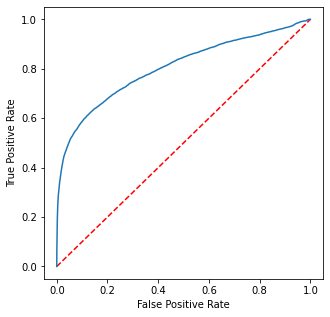

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot([0, 1], [0, 1], 'r--')
plt.plot(Best_Model.stages[1].summary.roc.select('FPR').collect(),
         Best_Model.stages[1].summary.roc.select('TPR').collect())
plt.xlabel('False Positive Rate')  
plt.ylabel('True Positive Rate')
plt.show()

#### M3 GRADIENT BOOSTED TREE

In [0]:
gbt = GBTClassifier()
gbt_rf =  basePipeline + [gbt]
gbparamGrid = (ParamGridBuilder()\
               .baseOn({pipeline_2.stages: gbt_rf})\
               .addGrid(gbt.maxDepth, [3, 5])\
               .addGrid(gbt.maxBins, [150,200])\
               .addGrid(gbt.maxIter, [10, 20])\
               .build())

paramGrid = gbparamGrid


In [0]:
mlflow.sklearn.autolog()
with mlflow.start_run():
  evaluator = BinaryClassificationEvaluator()
  cv = CrossValidator()\
  .setEstimator(pipeline_2)\
  .setEstimatorParamMaps(paramGrid)\
  .setEvaluator(evaluator)\
  .setNumFolds(4)

cvModel = cv.fit(train_data)

In [0]:
gbt_predictions = cvModel.transform(test_data)
predict_labels_df = gbt_predictions.select("prediction", "label")
predict_labels_rdd =  predict_labels_df.rdd.map(list)

In [0]:
gbtmetrics_bc = BinaryClassificationMetrics(predict_labels_rdd)
gbtmetrics_mc = MulticlassMetrics(predict_labels_rdd)

In [0]:
gbt_areaUnderPR = gbtmetrics_bc.areaUnderPR
gbt_areaUnderROC = gbtmetrics_bc.areaUnderROC
gbt_accuracy =  gbtmetrics_mc.accuracy
gbt_precision  =  gbtmetrics_mc.precision(1)
gbt_recall = gbtmetrics_mc.recall(1)
gbt_precision_0  =  gbtmetrics_mc.precision(0)
gbt_recall_0 = gbtmetrics_mc.recall(0)
print(gbt_precision_0, gbt_recall_0)

In [0]:
print (gbtmetrics_mc.confusionMatrix().toArray())

For Gradent Boosted Tree model <br>
1) Area Under Precision-Recall (APR) Curve is 0.8608608608608609 <br>
2) The Areea Under curve (AUC) metric for the Decision Tree model 0.7709884368993762 <br>
3) The Accuracy of the Decision Tree model is 0.9577799454741002 <br>
4) The Precision of the Decision Tree model is 0.8608608608608609 <br>
5) The Recall of the Decision Tree model is 0.549520766773163<br>

d
 ###MODELS EVALUATION (M1 - DECISION TREE with fewer predictors)

#####Predict the classification for test data.

In [0]:
predictions = cvModel.transform(test_data)

#####EVALUATE THE MODEL USING ACCURACY, RECALL AND AREA UNDER CURVE METRICS

Since this is an imbalanced dataset (8% Fraud rate in the merged dataset), The recall value is more importnat than the Accuracy <br>
Area udner Precision-Recall Curve, Area Under Curve (AUC), Accuracy, Recall values are measured.<br>
The AUC = 0.663 and Area Under PR = 0.3957 indicate, that the model performs better than the Random model<br>
Accuracy at ~80% indicates the model can be still imporved.<br>

In [0]:
evaluator_new = BinaryClassificationEvaluator(labelCol="isFraud", rawPredictionCol="prediction")

Test data Area Under ROC: 0.6634296405540621

In [0]:
AUPR_Value = (evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderPR"}))
print("Area under PR = %s" % AUPR_Value)

Area under PR = 0.3957612949664601

In [0]:
AUC_Value = (evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"}))
print(AUC_Value)

0.6634296405540621

In [0]:
accuracy = evaluator_new.evaluate(predictions, {evaluator.metricName: "accuracy"})

Accuracy = 0.791653

In [0]:
recall = evaluator_new.evaluate(predictions, {evaluator.metricName: "weightedRecall"})
print(recall)

0.7916531136466256

<b>
1) Area under Precision-Recall Curve 0.39576 <br>
2) The area under curve (AUC) metric for the Decision Tree model is 0.663 <br>
3) The Accuracy of the Decision Tree model is 0.79<br>
4) The Weighted recall of the model is 0.791<br>
<b>

Below table shows the recoreds from test data where the prediction has not matched with the actual label.

In [0]:
display(predictions[predictions["isFraud"] != predictions["prediction"]])

TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,V95,V96,V97,V98,V99,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V112,V113,V114,V115,V116,V117,V118,V119,V120,V121,V122,V123,V124,V125,V126,V127,V128,V129,V130,V131,V132,V133,V134,V135,V136,V137,V167,V168,V169,V170,V171,V172,V173,V174,V175,V176,V177,V178,V179,V180,V181,V182,V183,V184,V185,V186,V187,V188,V189,V190,V191,V192,V193,V194,V195,V196,V197,V198,V199,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V212,V213,V214,V215,V216,V220,V221,V222,V227,V234,V238,V239,V245,V250,V251,V255,V256,V259,V270,V271,V272,V279,V280,V281,V282,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292,V293,V294,V295,V296,V297,V298,V299,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,id_01,id_02,id_05,id_06,id_11,id_17,id_19,id_20,ProductCD_index,card4_index,card6_index,id_12_index,id_15_index,id_28_index,id_29_index,id_31_index,id_35_index,id_36_index,id_37_index,id_38_index,DeviceType_index,features,label,rawPrediction,probability,prediction
3014811,0,694858,7.897,3900,123.0,144.0,147.0,4.0,6.0,0.0,5.0,0.0,5.0,5.0,6.0,0.0,6.0,7.0,7.0,7.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-15.0,543320.0,0.0,0.0,100.0,102.0,449.0,269.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,1.0,0.0,0.0,1.0,0.0,"Map(vectorType -> sparse, length -> 41, indices -> List(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 21, 22, 25, 26, 27, 28, 36, 39), values -> List(694858.0, 7.897, 3900.0, 123.0, 144.0, 147.0, 4.0, 6.0, 5.0, 5.0, 5.0, 6.0, 6.0, 7.0, 7.0, 7.0, 4.0, -15.0, 543320.0, 100.0, 102.0, 449.0, 269.0, 1.0, 1.0))",0.0,"Map(vectorType -> dense, length -> 2, values -> List(2.0, 4.0))","Map(vectorType -> dense, length -> 2, values -> List(0.3333333333333333, 0.6666666666666666))",1.0
3020089,1,833782,19.822,2502,141.0,185.0,226.0,511.0,932.0,0.0,265.0,0.0,265.0,266.0,377.0,0.0,482.0,397.0,397.0,452.0,163.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,15.857600212097168,15.857600212097168,15.857600212097168,1.0,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,15.857600212097168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,94776.0,0.0,0.0,100.0,225.0,266.0,507.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,35.0,1.0,0.0,0.0,1.0,1.0,"Map(vectorType -> sparse, length -> 41, indices -> List(0, 1, 2, 3, 4, 5, 6, 7, 9, 11, 12, 13, 15, 16, 17, 18, 19, 22, 25, 26, 27, 28, 36, 39, 40), values -> List(833782.0, 19.822, 2502.0, 141.0, 185.0, 226.0, 511.0, 932.0, 265.0, 265.0, 266.0, 377.0, 482.0, 397.0, 397.0, 452.0, 163.0, 94776.0